##### import libraries 

In [1]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np 
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt 


from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error, accuracy_score,classification_report
from sklearn.feature_selection import SelectFromModel


# Classification Models

from sklearn.ensemble import RandomForestClassifier
import mlflow 
import pickle 
import mlflow.sklearn
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from datetime import datetime



##### Load data  

In [2]:
df = pd.read_csv('../data/data_clean.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
3,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
4,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


#### Label encoding of target variable

In [4]:
le =LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
3,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
4,844359,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


##### multicollinearity 

###### high and low correlated columns 

In [6]:
cor_matrix = df.iloc[:,2:].corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
high_cols = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
low_cols = [column for column in upper_tri.columns if any(upper_tri[column] <= 0.90)]

In [7]:
high_cols

['perimeter_mean',
 'area_mean',
 'concave points_mean',
 'perimeter_se',
 'area_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'concave points_worst']

In [8]:
low_cols

['texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

##### split target variable and independent variables

In [9]:
X = df.iloc[:,2:]
y = df[['diagnosis']]

##### feature scaling

In [10]:
scaler = MinMaxScaler()
scaler.fit(X)
Xs = scaler.transform(X)

###### train and test splitting  

In [11]:
X_train,X_test,y_train,y_test = train_test_split(Xs,y,test_size=0.2,random_state=42)

In [12]:
print(f'X-train shape is{X_train.shape}')
print(f'X-test shape is{X_test.shape}')
print(f'y-train shape is{y_train.shape}')
print(f'y-test shape is{y_test.shape}')

X-train shape is(388, 30)
X-test shape is(98, 30)
y-train shape is(388, 1)
y-test shape is(98, 1)


##### model random forest 

In [13]:
criter = 'gini'
depth = 20
estimators =60
boot = False

with mlflow.start_run():
    RandomForest_pipeline=Pipeline([
                         ('imputer', SimpleImputer(strategy='mean')),
                        ('scaler',StandardScaler()),
                         ('rf_classifier',RandomForestClassifier( n_estimators=estimators,
                                    max_depth=depth,
                                    criterion=criter,
                                    bootstrap=boot))])
    
    rf_model = RandomForest_pipeline.fit(X_train,y_train)
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)

    mlflow.log_param("number of estimators", estimators)
    mlflow.log_param("maximum depth", depth)
    mlflow.log_param("Criterion", criter)
    mlflow.log_param("bootstrap", boot)
    mlflow.log_metric("accuracy score", accuracy)
    
    mlflow.sklearn.log_model(rf_model,"classifier model")

###### feature importance 

In [14]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [15]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

df_features = pd.DataFrame(feat_importances)
df_ = df_features.reset_index().rename(columns={'index':'Features',0:'importance'})
df_.head(10)

,Features,importance
0,perimeter_worst,0.163518
1,area_worst,0.137457
2,radius_worst,0.097964
3,concavity_mean,0.082454
4,concave points_mean,0.082297
5,concave points_worst,0.064016
6,perimeter_mean,0.058099
7,concavity_worst,0.055959
8,area_mean,0.027265
9,compactness_worst,0.024315


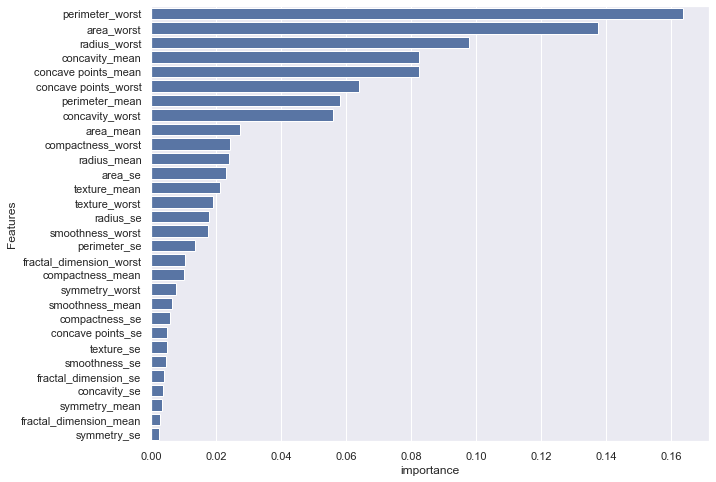

In [16]:
plt.figure(figsize=(10,8))
sns.barplot(x="importance", y="Features", data=df_,color=sns.color_palette()[0]);

###### select important features 

In [17]:
selected = SelectFromModel(RandomForestClassifier(n_estimators = 100))
selected.fit(X_train, y_train)
selected.get_support()
selected_features= X.columns[(selected.get_support())]
selected_features

Index(['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean',
       'area_se', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')

##### model serialization

In [18]:
filename = '../models/' + datetime.now().strftime("%Y-%m-%d-%H-%M-%S") + '.pkl'

with open(filename,'wb') as f:
    pickle.dump(rf_model,f)

In [37]:
selected_features_list = selected_features.tolist()

In [38]:
selected_features_list.append('diagnosis')

In [40]:
df_final = df[selected_features_list]

In [42]:
df_final.to_csv('../data/data_final.csv',index=False)